In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Load Files
CriminalActsByLEA_to_load = "CriminalActsByLEA.csv"
DropoutTableRace_to_load = "DropoutTableRace.csv"
subgroup_growth_byLEA_to_load = "subgroup_growth_byLEA.csv"

In [3]:
# Read School and Student Data File and store into Pandas Data Frames
crime_data = pd.read_csv(CriminalActsByLEA_to_load, delimiter=',', encoding="utf-8-sig")
dropout_data = pd.read_csv(DropoutTableRace_to_load, delimiter=',', encoding="utf-8-sig")
growth_data = pd.read_csv(subgroup_growth_byLEA_to_load, delimiter=',', encoding="utf-8-sig")

In [4]:
# Data Cleanup

In [5]:
crime_data.columns

Index(['LEA_CODE', 'LEA_NAME', 'AR', 'AW', 'AP', 'BT', 'BS', 'D', 'K', 'PA',
       'PS', 'PF', 'PW', 'R', 'RW', 'SA', 'SO', 'IM', '# of acts', 'ADM',
       'crime_rate', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [7]:
crime_data.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'], axis=1)

,LEA_CODE,LEA_NAME,AR,AW,AP,BT,BS,D,K,PA,...,PF,PW,R,RW,SA,SO,IM,# of acts,ADM,crime_rate
0,10,Alamance-Burlington Schools,3,0,23,0,0,0,0,18,...,5,53,0,0,4,7,0,200,22579,8.86
1,20,Alexander County Schools,0,0,7,1,0,0,0,3,...,0,2,0,0,0,0,0,26,4746,5.48
2,30,Alleghany County Schools,0,0,0,0,0,0,0,6,...,1,3,0,0,0,0,0,14,1332,10.51
3,40,Anson County Schools,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,11,3148,3.49
4,50,Ashe County Schools,1,0,3,1,0,0,0,0,...,0,2,0,0,0,0,0,17,2946,5.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,960,Wayne County Public Schools,0,0,7,2,0,0,0,7,...,2,26,0,0,0,0,0,73,18039,4.05
112,970,Wilkes County Schools,1,0,6,0,0,0,0,25,...,0,5,0,0,1,2,0,69,8972,7.69
113,980,Wilson County Schools,0,1,11,2,0,0,0,0,...,5,19,0,0,0,0,0,77,11024,6.98
114,990,Yadkin County Schools,0,0,1,0,0,0,0,6,...,0,6,0,0,0,5,0,40,5122,7.81


In [8]:
dropout_data.columns

Index(['LEA_CODE', 'LEA_Name', 'd_Total', 'd_Female', 'd_Male', 'd_Asian',
       'd_Black', 'd_Hispanic', 'd_American_Indian', 'd_Two-or-More-Races',
       'd_NHPI', 'd_White'],
      dtype='object')

In [9]:
growth_data.columns

Index(['District_Name', 'Growth_AIG', 'All Students', 'Growth_American Indian',
       'Growth_Asian', 'Growth_Black', 'Growth_ED', 'Growth_ELL',
       'Growth_Hispanic', 'Growth_SwD', 'Growth_MultiRacial', 'Growth_White'],
      dtype='object')

In [10]:
# Merge dataframes

In [11]:
# Combine the data into a single dataframe
crime_dropout = pd.concat([crime_data, dropout_data], axis=1, sort=False)
crime_dropout.head()

,LEA_CODE,LEA_NAME,AR,AW,AP,BT,BS,D,K,PA,...,d_Total,d_Female,d_Male,d_Asian,d_Black,d_Hispanic,d_American_Indian,d_Two-or-More-Races,d_NHPI,d_White
0,10,Alamance-Burlington Schools,3,0,23,0,0,0,0,18,...,231.0,88.0,143.0,1.0,59.0,61.0,0.0,8.0,0.0,102.0
1,20,Alexander County Schools,0,0,7,1,0,0,0,3,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,30,Alleghany County Schools,0,0,0,0,0,0,0,6,...,8.0,4.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
3,40,Anson County Schools,0,0,0,0,0,0,0,0,...,34.0,16.0,18.0,0.0,16.0,2.0,0.0,3.0,0.0,13.0
4,50,Ashe County Schools,1,0,3,1,0,0,0,0,...,3.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


In [12]:
# Iterates through all column data to find NaN values and adds them to a list
crime_dropout.columns[crime_dropout.isna().any()].tolist()
crime_dropout.head()

,LEA_CODE,LEA_NAME,AR,AW,AP,BT,BS,D,K,PA,...,d_Total,d_Female,d_Male,d_Asian,d_Black,d_Hispanic,d_American_Indian,d_Two-or-More-Races,d_NHPI,d_White
0,10,Alamance-Burlington Schools,3,0,23,0,0,0,0,18,...,231.0,88.0,143.0,1.0,59.0,61.0,0.0,8.0,0.0,102.0
1,20,Alexander County Schools,0,0,7,1,0,0,0,3,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,30,Alleghany County Schools,0,0,0,0,0,0,0,6,...,8.0,4.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
3,40,Anson County Schools,0,0,0,0,0,0,0,0,...,34.0,16.0,18.0,0.0,16.0,2.0,0.0,3.0,0.0,13.0
4,50,Ashe County Schools,1,0,3,1,0,0,0,0,...,3.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


In [13]:
# Combine the data into a single dataframe
crime_dropout_growth = pd.concat([crime_dropout, growth_data], axis=1, sort=False)
crime_dropout_growth

,LEA_CODE,LEA_NAME,AR,AW,AP,BT,BS,D,K,PA,...,All Students,Growth_American Indian,Growth_Asian,Growth_Black,Growth_ED,Growth_ELL,Growth_Hispanic,Growth_SwD,Growth_MultiRacial,Growth_White
0,10,Alamance-Burlington Schools,3,0,23,0,0,0,0,18,...,0.050000,NaN,NaN,-0.021429,-0.395714,-0.008,0.998571,-1.013333,-0.048333,-7.585714e-01
1,20,Alexander County Schools,0,0,7,1,0,0,0,3,...,-1.510000,NaN,NaN,-0.750000,-2.450000,NaN,-0.960000,-0.400000,-0.040000,-1.270000e+00
2,30,Alleghany County Schools,0,0,0,0,0,0,0,6,...,-1.960000,NaN,NaN,NaN,-1.040000,NaN,-0.030000,-2.020000,NaN,-2.270000e+00
3,40,Anson County Schools,0,0,0,0,0,0,0,0,...,-2.040000,NaN,NaN,-1.540000,-1.523333,NaN,-1.340000,-1.900000,NaN,-1.855000e+00
4,50,Ashe County Schools,1,0,3,1,0,0,0,0,...,-9.070000,NaN,NaN,NaN,-7.990000,-0.680,-2.010000,-5.310000,NaN,-9.370000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,960,Wayne County Public Schools,0,0,7,2,0,0,0,7,...,-0.058000,NaN,NaN,-1.170000,-0.402000,NaN,0.010000,-1.242500,-1.950000,-4.440892e-17
112,970,Wilkes County Schools,1,0,6,0,0,0,0,25,...,2.150000,NaN,NaN,1.330000,1.290000,0.015,0.890000,-0.566667,NaN,8.425000e-01
113,980,Wilson County Schools,0,1,11,2,0,0,0,0,...,-1.113333,NaN,NaN,NaN,0.113333,0.490,1.000000,-1.060000,NaN,-1.863333e+00
114,990,Yadkin County Schools,0,0,1,0,0,0,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Export file as a CSV, without the Pandas index, but with the header
crime_dropout_growth.to_csv("/Users/erikaberry/Desktop/Web-Design-Challenge/crime_dropout_growth.csv", index=False, header=True)

In [15]:
#https://github.com/erikarberry/python-api-challenge/blob/master/WeatherPy/WeatherPy.ipynb

In [ ]:
# Is there a relationship between an LEA's Crime Rate and Academic Growth?

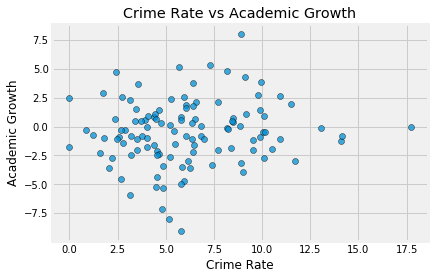

In [16]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

# Crime Rate v Academic Growth
plt.scatter(crime_dropout_growth["crime_rate"], crime_dropout_growth["All Students"], alpha=.75, marker="o", edgecolors="black")
plt.title("Crime Rate vs Academic Growth")
plt.ylabel("Academic Growth")
plt.xlabel("Crime Rate")
plt.grid(True)

# Save the figure
plt.savefig("CrimeRateVsAcadGrowth.png")

# Show plot
plt.show()

In [19]:
# Is there a relationship between the academic growth gaps of white and black students and the overall growth rate? 

In [20]:
crime_dropout_growth.columns

Index(['LEA_CODE', 'LEA_NAME', 'AR', 'AW', 'AP', 'BT', 'BS', 'D', 'K', 'PA',
       'PS', 'PF', 'PW', 'R', 'RW', 'SA', 'SO', 'IM', '# of acts', 'ADM',
       'crime_rate', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'LEA_CODE', 'LEA_Name',
       'd_Total', 'd_Female', 'd_Male', 'd_Asian', 'd_Black', 'd_Hispanic',
       'd_American_Indian', 'd_Two-or-More-Races', 'd_NHPI', 'd_White',
       'District_Name', 'Growth_AIG', 'All Students', 'Growth_American Indian',
       'Growth_Asian', 'Growth_Black', 'Growth_ED', 'Growth_ELL',
       'Growth_Hispanic', 'Growth_SwD', 'Growth_MultiRacial', 'Growth_White'],
      dtype='object')

In [21]:
crime_dropout_growth.columns

Index(['LEA_CODE', 'LEA_NAME', 'AR', 'AW', 'AP', 'BT', 'BS', 'D', 'K', 'PA',
       'PS', 'PF', 'PW', 'R', 'RW', 'SA', 'SO', 'IM', '# of acts', 'ADM',
       'crime_rate', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'LEA_CODE', 'LEA_Name',
       'd_Total', 'd_Female', 'd_Male', 'd_Asian', 'd_Black', 'd_Hispanic',
       'd_American_Indian', 'd_Two-or-More-Races', 'd_NHPI', 'd_White',
       'District_Name', 'Growth_AIG', 'All Students', 'Growth_American Indian',
       'Growth_Asian', 'Growth_Black', 'Growth_ED', 'Growth_ELL',
       'Growth_Hispanic', 'Growth_SwD', 'Growth_MultiRacial', 'Growth_White'],
      dtype='object')

In [22]:
# Rearrange dataset to display most useful columns
crime_dropout_growth_gap = crime_dropout_growth[["LEA_Name", "Growth_Black", "Growth_White", "All Students"]]

crime_dropout_growth_gap.head(20)

,LEA_Name,Growth_Black,Growth_White,All Students
0,Alamance-Burlington Schools,-0.021429,-0.758571,0.050000
1,Alexander County Schools,-0.750000,-1.270000,-1.510000
2,Alleghany County Schools,NaN,-2.270000,-1.960000
3,Anson County Schools,-1.540000,-1.855000,-2.040000
4,Ashe County Schools,NaN,-9.370000,-9.070000
5,Avery County Schools,2.060000,-0.190000,1.950000
6,Beaufort County Schools,-0.695000,-1.195000,-1.575000
7,Bertie County Schools,NaN,-2.820000,-2.710000
8,Bladen County Schools,-0.297500,-0.810000,-0.285000
9,Buncombe County Schools,-0.630000,0.005000,-0.415000


In [27]:
# Add column to dataframe showing gap
crime_dropout_growth_gap['gap'] = crime_dropout_growth_gap['Growth_White'] - crime_dropout_growth_gap['Growth_Black']

In [24]:
crime_dropout_growth_gap = crime_dropout_growth_gap.dropna()
crime_dropout_growth_gap.head()

,LEA_Name,Growth_Black,Growth_White,All Students,gap
0,Alamance-Burlington Schools,-0.021429,-0.758571,0.050,-0.737143
1,Alexander County Schools,-0.750000,-1.270000,-1.510,-0.520000
3,Anson County Schools,-1.540000,-1.855000,-2.040,-0.315000
5,Avery County Schools,2.060000,-0.190000,1.950,-2.250000
6,Beaufort County Schools,-0.695000,-1.195000,-1.575,-0.500000


In [25]:
crime_dropout_growth_gap.describe()

,Growth_Black,Growth_White,All Students,gap
count,94.000000,94.000000,94.000000,94.000000
mean,-0.573777,-0.397167,-0.322892,0.176610
std,1.486197,2.134608,2.806796,1.457590
min,-6.690000,-5.817778,-8.050000,-3.147500
25%,-1.432500,-1.587500,-2.036000,-0.677306
50%,-0.413929,-0.257500,-0.285000,-0.012857
75%,0.299375,0.565000,1.332500,1.012857
max,2.465000,6.803333,8.023333,4.338333


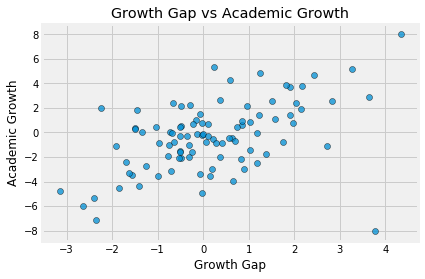

In [26]:
# Growth Gap v Academic Growth
plt.scatter(crime_dropout_growth_gap["gap"], crime_dropout_growth_gap["All Students"], alpha=.75, marker="o", edgecolors="black")
plt.title("Growth Gap vs Academic Growth")
plt.ylabel("Academic Growth")
plt.xlabel("Growth Gap")
plt.grid(True)

# Save the figure
plt.savefig("GrowthGapVsAcadGrowth.png")

# Show plot
plt.show()

In [62]:
# Plot dropout rates

In [69]:
dropout_data.loc['sum'] = dropout_data.sum()
dropout_data

,LEA_CODE,LEA_Name,d_Total,d_Female,d_Male,d_Asian,d_Black,d_Hispanic,d_American_Indian,d_Two-or-More-Races,d_NHPI,d_White
0,10,Alamance-Burlington Schools,231,88.0,143,1.0,59.0,61.0,0.0,8.0,0.0,102.0
1,20,Alexander County Schools,2,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,30,Alleghany County Schools,8,4.0,4,0.0,0.0,0.0,0.0,5.0,0.0,6.0
3,40,Anson County Schools,34,16.0,18,0.0,16.0,2.0,0.0,3.0,0.0,13.0
4,50,Ashe County Schools,3,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
111,970,Wilkes County Schools,69,32.0,37,0.0,1.0,8.0,0.0,4.0,0.0,56.0
112,980,Wilson County Schools,103,31.0,72,0.0,55.0,24.0,0.0,3.0,0.0,21.0
113,990,Yadkin County Schools,4,1.0,3,0.0,0.0,2.0,0.0,1.0,0.0,1.0
114,995,Yancey County Schools,19,6.0,13,0.0,0.0,2.0,0.0,0.0,0.0,17.0


In [70]:
import squarify

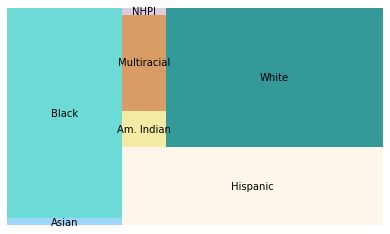

In [83]:
# Set up treemap
dropout_data_treemap = pd.DataFrame({'sums':[96,2746,2318,183,479,33,3427], 'race':["Asian", "Black", "Hispanic", "Am. Indian", "Multiracial", "NHPI", "White"]})
squarify.plot(sizes=dropout_data_treemap['sums'], label=dropout_data_treemap['race'], alpha=.8, 
              color=["lightskyblue", "mediumturquoise", "oldlace", "khaki", "peru", "thistle", "teal"])
plt.axis('off')
plt.title = "Statewide Droput Rates, By Race/Ethnicity"
plt.savefig("DropoutTreemap.png")
plt.show()